In [2]:
#Import libraries

import pandas as pd
import numpy as np
import pylab
import math

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
from scipy import stats

In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

In [7]:
#load the data
df = pd.read_csv('data/kc_house_data.csv')


In [8]:
df.shape

(21597, 21)

In [9]:
#checking data types to see if anything looks weird.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [10]:
#looking at basic stats to see anything out of place.

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [11]:
#Creating a data frame that removes all renovated homes.
df_nonreno = df[df.yr_renovated == 0]
df_nonreno = df_nonreno.dropna()
df_nonreno

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,...,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [12]:
#check for nulls
display(df_nonreno.isnull().any())
df_nonreno.shape

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

(15111, 21)

In [13]:
min_threshold, max_threshold = df_nonreno.price.quantile([0.25, 0.75])
min_threshold, max_threshold

#removing outliers with interquartile method


(320000.0, 633000.0)

In [14]:
df_1 = df_nonreno[(df_nonreno.price < max_threshold) & (df_nonreno.price > min_threshold)]

In [15]:
df_1.shape

(7491, 21)

In [16]:
#Separating out continuous and categorical columns for future use
conts= []
cats= []

In [17]:
for col in df_1.columns:
    if (df_nonreno[col].nunique() < 25):
        cats.append(col)
    else: 
        conts.append(col)

In [18]:
conts

['id',
 'date',
 'price',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [19]:
cats

['bedrooms',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'yr_renovated']

In [20]:
df_conts = df_1.loc[:,conts]

In [21]:
df_cats = df_1.loc[:,cats]

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>]], dtype=object)

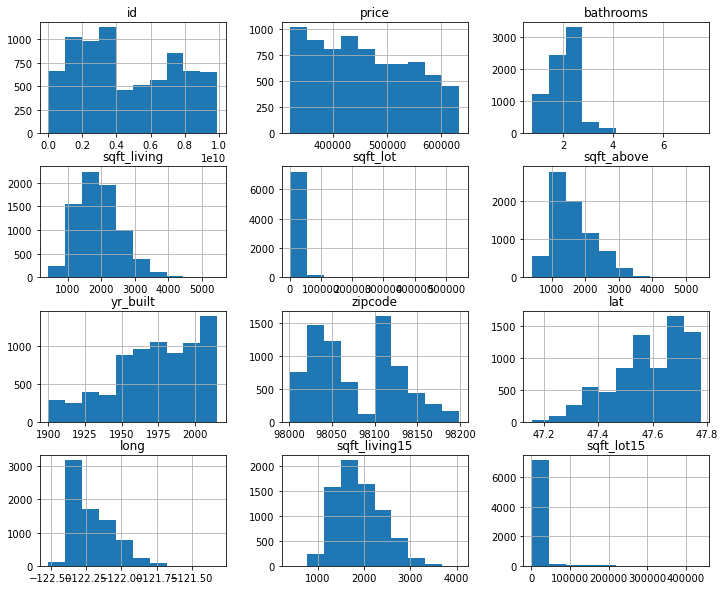

In [22]:
df_conts.hist(figsize = (12,10))

<AxesSubplot:>

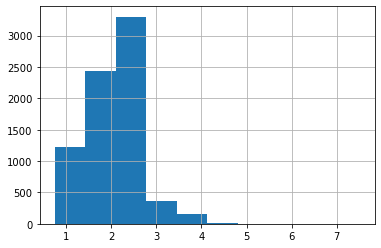

In [23]:
df_1.bathrooms.hist()

In [24]:
df_1 = df_1[df_1['bathrooms'] < 4]

<AxesSubplot:>

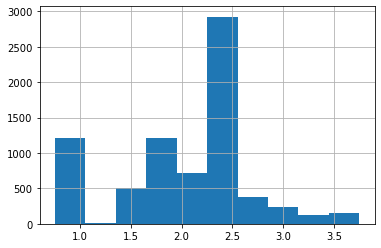

In [25]:
df_1.bathrooms.hist()

array([[<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>],
       [<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>],
       [<AxesSubplot:title={'center':'yr_renovated'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

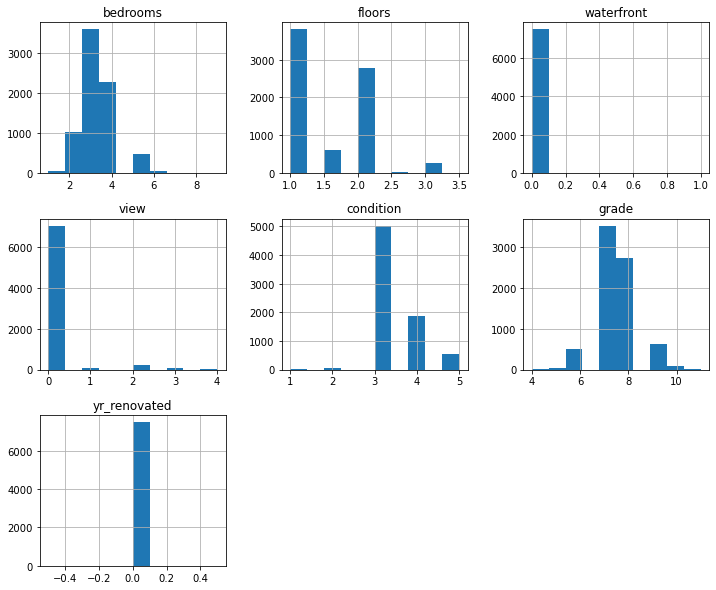

In [26]:
df_cats.hist(figsize = (12,10))

<AxesSubplot:>

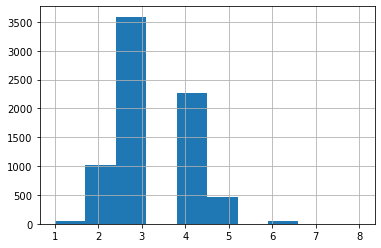

In [27]:
df_1.bedrooms.hist()

In [28]:
#checking to see that the shape is smaller due to outliers being removed
df_1.shape

(7463, 21)

In [29]:
df_1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570
11,9212900260,5/27/2014,468000.0,2,1.00,1160,6000,1.0,0.0,0.0,...,7,860,300.0,1942,0.0,98115,47.6900,-122.292,1330,6000
13,6054650070,10/7/2014,400000.0,3,1.75,1370,9680,1.0,0.0,0.0,...,7,1370,0.0,1977,0.0,98074,47.6127,-122.045,1370,10208


In [30]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7463 entries, 3 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7463 non-null   int64  
 1   date           7463 non-null   object 
 2   price          7463 non-null   float64
 3   bedrooms       7463 non-null   int64  
 4   bathrooms      7463 non-null   float64
 5   sqft_living    7463 non-null   int64  
 6   sqft_lot       7463 non-null   int64  
 7   floors         7463 non-null   float64
 8   waterfront     7463 non-null   float64
 9   view           7463 non-null   float64
 10  condition      7463 non-null   int64  
 11  grade          7463 non-null   int64  
 12  sqft_above     7463 non-null   int64  
 13  sqft_basement  7463 non-null   object 
 14  yr_built       7463 non-null   int64  
 15  yr_renovated   7463 non-null   float64
 16  zipcode        7463 non-null   int64  
 17  lat            7463 non-null   float64
 18  long   

In [31]:
#removed objects

drop_these = ['date', 'sqft_basement']
df_1 = df_1.drop(columns=drop_these)

<AxesSubplot:>

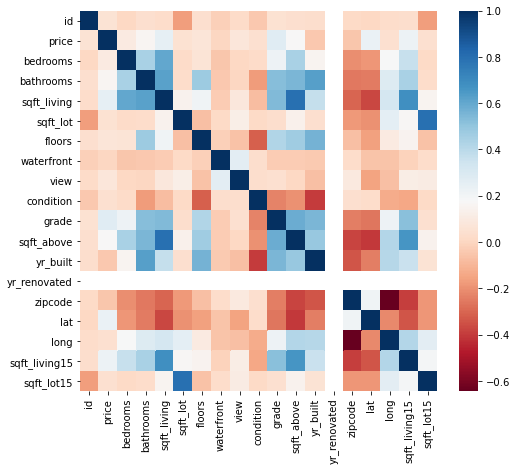

In [32]:
#Looking at the correlation between different columns to check for multicollinearity.

plt.figure(figsize = (8,7))
sns.heatmap(df_1.corr(), cmap = 'RdBu')

In [33]:
df_1.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.057410,0.008167,0.039582,0.028813,-0.166215,0.043157,-0.019462,0.021230,-0.042187,0.056489,0.040676,0.033303,NaN,0.015404,0.008384,0.029212,0.031312,-0.163285
price,0.057410,1.000000,0.103860,0.162901,0.250375,0.051550,0.071197,-0.000221,0.076655,0.045759,0.279945,0.173766,-0.043132,NaN,-0.049999,0.235994,0.045814,0.228798,0.049972
bedrooms,0.008167,0.103860,1.000000,0.442493,0.607144,0.021837,0.067009,-0.046290,0.010038,0.023191,0.216999,0.442826,0.156021,NaN,-0.200740,-0.186543,0.178658,0.369780,0.016265
bathrooms,0.039582,0.162901,0.442493,1.000000,0.624024,0.028575,0.477179,-0.045602,0.004866,-0.173052,0.525752,0.551551,0.631429,NaN,-0.254120,-0.246707,0.290045,0.442290,0.026945
sqft_living,0.028813,0.250375,0.607144,0.624024,1.000000,0.144037,0.210679,-0.027832,0.087357,-0.073777,0.544033,0.799772,0.371493,NaN,-0.298893,-0.370093,0.324726,0.683063,0.155227
sqft_lot,-0.166215,0.051550,0.021837,0.028575,0.144037,1.000000,-0.068475,0.011647,0.121325,0.014277,0.036305,0.137114,0.042560,NaN,-0.174860,-0.195286,0.255851,0.169830,0.796673
floors,0.043157,0.071197,0.067009,0.477179,0.210679,-0.068475,1.000000,-0.020389,-0.061586,-0.312920,0.426201,0.467361,0.568878,NaN,-0.070967,-0.158953,0.103716,0.149416,-0.062589
waterfront,-0.019462,-0.000221,-0.046290,-0.045602,-0.027832,0.011647,-0.020389,1.000000,0.264524,0.033920,-0.032906,-0.027240,-0.038119,NaN,0.025718,-0.055645,-0.052780,-0.012409,0.025641
view,0.021230,0.076655,0.010038,0.004866,0.087357,0.121325,-0.061586,0.264524,1.000000,0.034794,0.047882,0.006568,-0.069692,NaN,0.096088,-0.153777,-0.067724,0.118145,0.112953
condition,-0.042187,0.045759,0.023191,-0.173052,-0.073777,0.014277,-0.312920,0.033920,0.034794,1.000000,-0.231297,-0.196604,-0.396504,NaN,0.040916,0.026626,-0.123659,-0.139879,0.014933


In [34]:
#eliminating multicolliniarity
#variance inflation factor
X1 = sm.tools.add_constant(df_1)
#create a series for both
series_before = pd.Series([variance_inflation_factor(X1.values, i ) for i in range(X1.shape[1])], index = X1.columns)

print('DATA BEFORE')
print('-'*100)
display(series_before)

df_1_after = df_1.drop(['sqft_living', 'yr_renovated', 'sqft_living15', 'sqft_lot15'], axis = 1)
X2 = sm.tools.add_constant(df_1_after)
series_after = pd.Series([variance_inflation_factor(X2.values, i ) for i in range(X2.shape[1])], index = X2.columns)

print('DATA AFTER')
print('-'*100)
display(series_after)

DATA BEFORE
----------------------------------------------------------------------------------------------------


/Users/andrewozbun/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/andrewozbun/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


const            0.000000
id               1.050223
price            1.467752
bedrooms         1.738973
bathrooms        2.747368
sqft_living      5.350057
sqft_lot         2.809206
floors           2.259178
waterfront       1.086952
view             1.189195
condition        1.260109
grade            2.204575
sqft_above       4.783382
yr_built         2.943083
yr_renovated          NaN
zipcode          1.847844
lat              1.529496
long             2.101515
sqft_living15    2.401203
sqft_lot15       2.814863
dtype: float64

DATA AFTER
----------------------------------------------------------------------------------------------------


const         0.000000
id            1.046028
price         1.419103
bedrooms      1.517867
bathrooms     2.380667
sqft_lot      1.184053
floors        1.868911
waterfront    1.085911
view          1.167484
condition     1.250530
grade         2.094251
sqft_above    2.587356
yr_built      2.937764
zipcode       1.823168
lat           1.501497
long          2.061987
dtype: float64

In [35]:
X = df_1_after.drop('price', axis = 1)
y = df_1_after[['price']]

#Split dataset into training and testing portion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

#create instance of our model
regression_model = LinearRegression()


In [36]:
#fit the model
regression_model.fit(X_train, y_train)

LinearRegression()

In [37]:
#Exploring the intercept and coefficient

intercept = regression_model.intercept_[0]
coef = regression_model.coef_[0][0]

print('The intercept for our model is {:.4}'.format(intercept))
print('-'*100)

#Loop through the dictionary and print the coeffcient data
#so, for instance, for each unit in sqft_above, there is a 9.4% rise in price.
for coef in zip(X.columns, regression_model.coef_[0]):
    print('The Coefficient for {} is {:.2}'.format(coef[0], coef[1]))

The intercept for our model is -6.431e+05
----------------------------------------------------------------------------------------------------
The Coefficient for id is 1.6e-06
The Coefficient for bedrooms is -8.8e+02
The Coefficient for bathrooms is 2.6e+04
The Coefficient for sqft_lot is 0.25
The Coefficient for floors is 9.8e+03
The Coefficient for waterfront is 2e+04
The Coefficient for view is 1.4e+04
The Coefficient for condition is 6.8e+03
The Coefficient for grade is 4.1e+04
The Coefficient for sqft_above is 2e+01
The Coefficient for yr_built is -1.2e+03
The Coefficient for zipcode is -5e+01
The Coefficient for lat is 2.7e+05
The Coefficient for long is 3.9e+04


In [38]:
#get predictions
y_predict = regression_model.predict(X_test)
#first five
y_predict[:5]

array([[520788.34010692],
       [396591.45717892],
       [430067.35280971],
       [507032.96960461],
       [415303.35688068]])

In [39]:
import statsmodels.stats.diagnostic as sm_diagnostic

In [40]:
X_1 = sm.add_constant(X)
model = sm.OLS(y, X_1)
est = model.fit()

In [41]:
#Heteroscedasticity checks

_, pval, _, f_pval = diag.het_breuschpagan(est.resid, est.model.exog)
print(pval, f_pval)


4.0313835296608366e-23 2.3458983327532776e-23


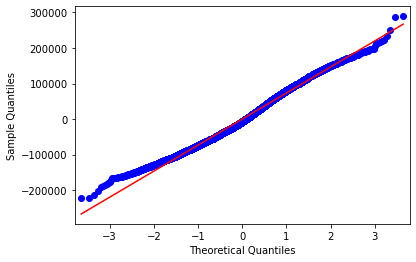

1.1772452451165904e-05

In [42]:
#check for the normality of the residuals
sm.qqplot(est.resid, line = 's')
pylab.show()

#check that the mean of the residuals is approx. 0
mean_residuals = sum(est.resid) / len(est.resid)
mean_residuals

In [43]:
#calculate the mean squared error
model_mse = mean_squared_error(y_test, y_predict)
#calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

#calculate the root mean squared error
model_rmse = math.sqrt(model_mse)

#display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 5.35e+09
MAE 6.01e+04
RMSE 7.31e+04


In [44]:
#R2
model_r2 = r2_score(y_test, y_predict)
model_r2

0.29047993325918964

In [45]:
est.conf_int()

,0,1
const,-4.625153e+06,3.105865e+06
id,7.418082e-07,1.932078e-06
bedrooms,-3.704933e+03,1.168490e+03
bathrooms,2.185464e+04,2.990136e+04
sqft_lot,1.684727e-01,2.735352e-01
floors,4.989856e+03,1.316844e+04
waterfront,-1.653016e+04,7.002142e+04
view,1.051137e+04,1.717684e+04
condition,4.504001e+03,1.041963e+04
grade,3.878441e+04,4.449556e+04


In [46]:
est.pvalues

const          7.000766e-01
id             1.079147e-05
bedrooms       3.076397e-01
bathrooms      4.425768e-36
sqft_lot       1.902331e-16
floors         1.365359e-05
waterfront     2.257390e-01
view           4.486075e-16
condition      7.769171e-07
grade         1.297150e-170
sqft_above     2.370175e-18
yr_built      4.642587e-124
zipcode        2.699927e-02
lat           9.773158e-267
long           4.274376e-06
dtype: float64

In [47]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     223.0
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:49:32   Log-Likelihood:                -94189.
No. Observations:                7463   AIC:                         1.884e+05
Df Residuals:                    7448   BIC:                         1.885e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.596e+05   1.97e+06     -0.385      0.7

In [48]:
#looking for relationships

[Text(0, 0, '98001'),
 Text(1, 0, '98002'),
 Text(2, 0, '98003'),
 Text(3, 0, '98004'),
 Text(4, 0, '98005'),
 Text(5, 0, '98006'),
 Text(6, 0, '98007'),
 Text(7, 0, '98008'),
 Text(8, 0, '98010'),
 Text(9, 0, '98011'),
 Text(10, 0, '98014'),
 Text(11, 0, '98019'),
 Text(12, 0, '98022'),
 Text(13, 0, '98023'),
 Text(14, 0, '98024'),
 Text(15, 0, '98027'),
 Text(16, 0, '98028'),
 Text(17, 0, '98029'),
 Text(18, 0, '98030'),
 Text(19, 0, '98031'),
 Text(20, 0, '98032'),
 Text(21, 0, '98033'),
 Text(22, 0, '98034'),
 Text(23, 0, '98038'),
 Text(24, 0, '98040'),
 Text(25, 0, '98042'),
 Text(26, 0, '98045'),
 Text(27, 0, '98052'),
 Text(28, 0, '98053'),
 Text(29, 0, '98055'),
 Text(30, 0, '98056'),
 Text(31, 0, '98058'),
 Text(32, 0, '98059'),
 Text(33, 0, '98065'),
 Text(34, 0, '98070'),
 Text(35, 0, '98072'),
 Text(36, 0, '98074'),
 Text(37, 0, '98075'),
 Text(38, 0, '98077'),
 Text(39, 0, '98092'),
 Text(40, 0, '98102'),
 Text(41, 0, '98103'),
 Text(42, 0, '98105'),
 Text(43, 0, '98106')

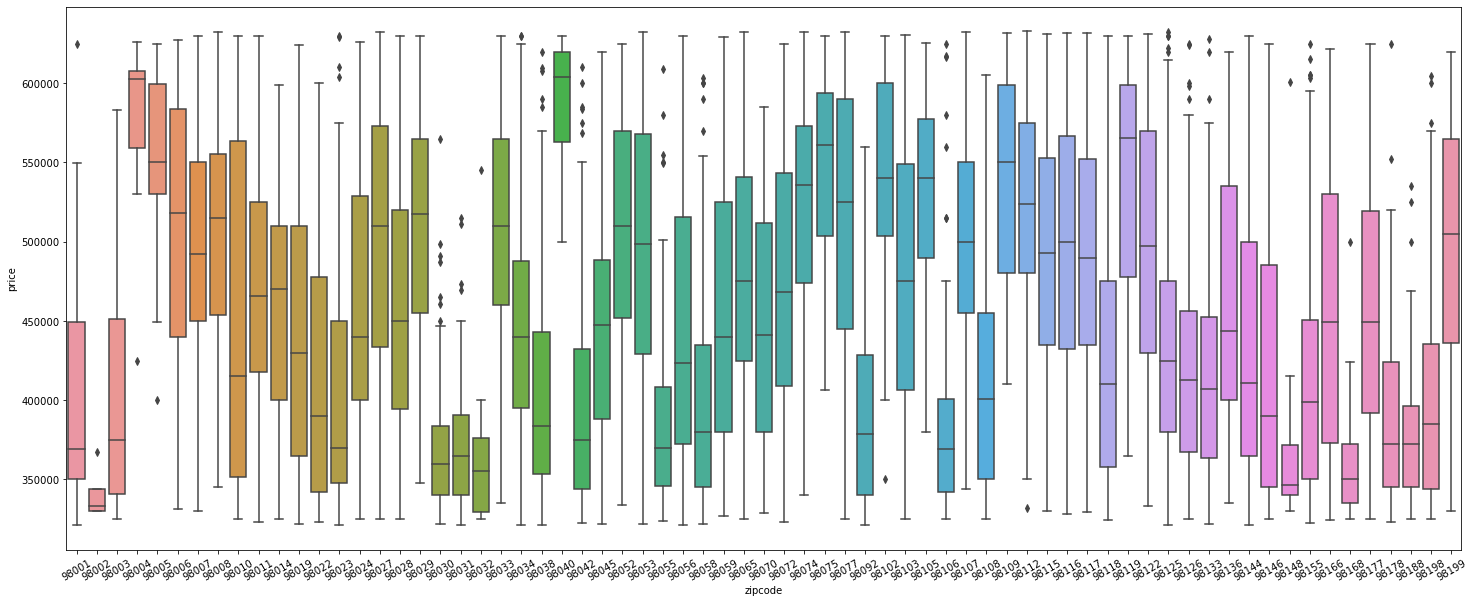

In [49]:
plt.figure(figsize=(25,10))
g = sns.boxplot(x = 'zipcode', y = 'price', data = df_1)
g.set_xticklabels(g.get_xticklabels(),rotation=30)

<AxesSubplot:xlabel='grade', ylabel='yr_built'>

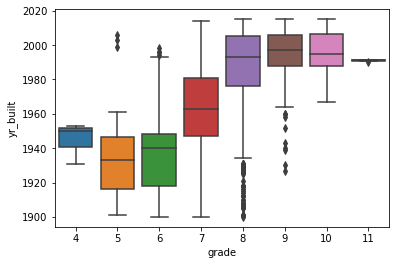

In [50]:
sns.boxplot(x = 'grade', y = 'yr_built', data = df_1)

In [61]:
import plotly.express as px
fig = px.box(df_1_after, x="yr_built", y="grade")
fig.show()